<a href="https://colab.research.google.com/github/GovindRBA/pde_code/blob/main/Experiment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



##Experiment 4: Solving the 1D Heat Equation
This experiment introduces the numerical solution of a parabolic partial differential equation: the one-dimensional heat equation. This equation is fundamental to understanding diffusion processes, not just in heat transfer but also in chemical concentration gradients and other physical phenomena.

##Aim
To solve the one-dimensional heat conduction equation using the Finite Difference Method (explicit scheme) in Python and to visualize the temperature distribution over time.

##Objectives
- To understand the physical interpretation of the one-dimensional heat equation.
- To discretize the heat equation using the Forward Time Centred Space (FTCS) scheme.
- To implement the finite difference method in Python.
- To analyze the stability condition required for this numerical method.
- To visualize the temperature profiles at different time levels.

##Governing Equation and Discretization
The one-dimensional heat equation describes how temperature u evolves at a position x and time t. It is given by:
$$\frac{\partial u}{\partial t} = \alpha \frac{\partial^2 u}{\partial x^2}$$




where $\alpha$ is the thermal diffusivity of the material, a constant that indicates how quickly the material conducts heat.

To solve this numerically, we use the FTCS method. We approximate the derivatives with finite differences:
 * Time Derivative (Forward Difference):$\frac{\partial u}{\partial t} \approx \frac{u_i^{n+1} - u_i^n}{\Delta t}$


 * Space Derivative (Centred Difference): $\frac{\partial^2 u}{\partial x^2} \approx \frac{u_{i+1}^n - 2u_i^n + u_{i-1}^n}{(\Delta x)^2}$



Here, the superscript n denotes the time level and the subscript i denotes the spatial grid point. Substituting these into the governing equation and rearranging for the future temperature $ u_i^{n+1}$
, we get the explicit update formula.

##Algorithm
1. **Initialize Parameters**: Set the values for the rod length L, total simulation time T, number of spatial nodes $n_x$
, number of time steps $n_t$
, and thermal diffusivity $\alpha$
.

2. **Discretize the Domain**: Calculate the step sizes for space and time.

Space step:$\Delta x = \frac{L}{n_x - 1}$

Time step: $\Delta t = \frac{T}{n_t}$

3. **Check Stability Condition**: Calculate the stability parameter, r. For the FTCS scheme to be stable and produce a physically realistic result, this value **must be less than or equal to 0.5**.
$$r = \frac{\alpha \Delta t}{(\Delta x)^2} \le 0.5$$


4. **Set Initial and Boundary Conditions**:

- Define the initial temperature distribution along the rod$u(x, 0)$.
- Apply boundary conditions. In this case, we use **Dirichlet boundary conditions**, which means the temperature at the ends of the rod is fixed for all time (e.g., $u(0, t) = u(L, t) = 0$
).
5.**Iterate Over Time**: For each time step n, loop through all the interior spatial points i and update their temperature using the FTCS formula:
$$u_i^{n+1} = u_i^n + r \left( u_{i+1}^n - 2u_i^n + u_{i-1}^n \right)$$

6.**Output and Visualization**: Store the temperature profiles at different time intervals and plot them to visualize the heat diffusion process.



##Sample Problem and Python Implementation
Problem: Solve the 1D heat equation on a rod of length L=1.0 m with the following conditions: The temperature is zero everywhere except at the very center, where an initial “heat pulse” of 100°C is applied. The ends of the rod are kept at a constant 0°C for all time.

Space step dx = 0.0500 m
Time step dt = 0.0001 s
Stability parameter r = 0.0004

Stability condition r <= 0.5 is satisfied.


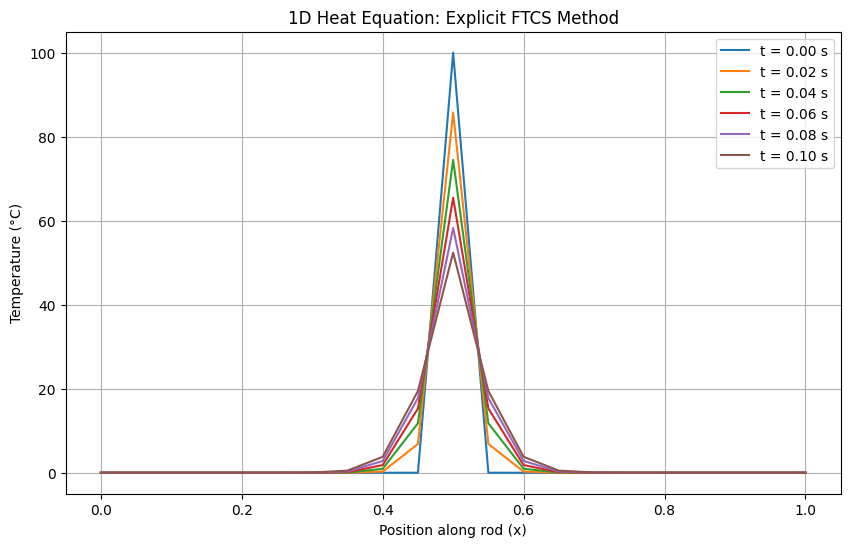

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Initialize Parameters ---
L = 1.0           # Length of the rod (meters)
T = 0.1           # Total simulation time (seconds)
nx = 21           # Number of spatial grid points (use an odd number for a perfect center)
nt = 1000         # Number of time steps
alpha = 0.01      # Thermal diffusivity (e.g., for copper)

# --- 2. Discretize the Domain ---
dx = L / (nx - 1)             # Space step size
dt = T / nt                   # Time step size

# --- 3. Check Stability Condition ---
r = alpha * dt / dx**2
print(f"Space step dx = {dx:.4f} m")
print(f"Time step dt = {dt:.4f} s")
print(f"Stability parameter r = {r:.4f}")
if r > 0.5:
    print("\n--- WARNING: STABILITY CONDITION r > 0.5 NOT MET! ---")
    print("The solution is likely to be unstable and blow up.")
else:
    print("\nStability condition r <= 0.5 is satisfied.")


# --- 4. Set Initial and Boundary Conditions ---
# Spatial grid
x = np.linspace(0, L, nx)

# Initial condition: temperature distribution is zero everywhere...
u = np.zeros(nx)
# ...except for a pulse at the center.
u[int((nx - 1) / 2)] = 100

# Boundary conditions u(0,t)=0 and u(L,t)=0 are enforced by the loop range (1, nx-1)

# --- 5. & 6. Time-stepping and Output ---
# To store results at different time steps for plotting
u_snapshots = [u.copy()]
snapshot_interval = 200 # Store a snapshot every 200 time steps

for n in range(nt):
    u_old = u.copy()
    # Loop over interior points to apply the FTCS formula
    for i in range(1, nx - 1):
        u[i] = u_old[i] + r * (u_old[i+1] - 2*u_old[i] + u_old[i-1])

    # Store a snapshot of the solution at specified intervals
    if (n + 1) % snapshot_interval == 0:
        u_snapshots.append(u.copy())

# --- Plotting the results ---
plt.figure(figsize=(10, 6))
for i, u_snap in enumerate(u_snapshots):
    time = i * snapshot_interval * dt
    plt.plot(x, u_snap, label=f't = {time:.2f} s')

plt.xlabel('Position along rod (x)')
plt.ylabel('Temperature (°C)')
plt.title('1D Heat Equation: Explicit FTCS Method')
plt.legend()
plt.grid(True)
plt.show()

## 3D version of the solution in spatial temporal domain


Space step dx = 0.0500 m
Time step dt = 0.0001 s
Stability parameter r = 0.0004

Stability condition r <= 0.5 is satisfied.


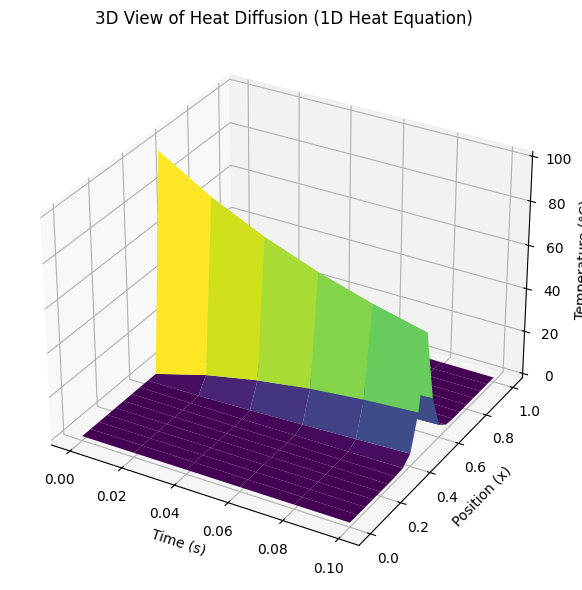

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# --- 1. Initialize Parameters ---
L = 1.0
T = 0.1
nx = 21
nt = 1000
alpha = 0.01

# --- 2. Discretize the Domain ---
dx = L / (nx - 1)
dt = T / nt

# --- 3. Check Stability Condition ---
r = alpha * dt / dx**2
print(f"Space step dx = {dx:.4f} m")
print(f"Time step dt = {dt:.4f} s")
print(f"Stability parameter r = {r:.4f}")
if r > 0.5:
    print("\n--- WARNING: STABILITY CONDITION r > 0.5 NOT MET! ---")
else:
    print("\nStability condition r <= 0.5 is satisfied.")

# --- 4. Initial and Boundary Conditions ---
x = np.linspace(0, L, nx)
u = np.zeros(nx)
u[int((nx - 1) / 2)] = 100

# --- 5. Time-stepping and Snapshot Storage ---
snapshot_interval = 200
snapshots = [u.copy()]
t_values = [0]

for n in range(nt):
    u_old = u.copy()
    for i in range(1, nx - 1):
        u[i] = u_old[i] + r * (u_old[i+1] - 2*u_old[i] + u_old[i-1])
    if (n + 1) % snapshot_interval == 0:
        snapshots.append(u.copy())
        t_values.append((n + 1) * dt)

# --- 6. Convert to Array and Create Meshgrid ---
U = np.array(snapshots).T  # Shape: (space, time)
T_mesh, X_mesh = np.meshgrid(t_values, x)

# --- 7. 3D Surface Plot ---
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(T_mesh, X_mesh, U, cmap=cm.viridis, edgecolor='none')

ax.set_xlabel('Time (s)')
ax.set_ylabel('Position (x)')
ax.set_zlabel('Temperature (°C)')
ax.set_title('3D View of Heat Diffusion (1D Heat Equation)')
plt.tight_layout()
plt.show()

## Application Challenge: Heat Dissipation in a Longer Rod
Now, let’s apply what you’ve learned to a new set of physical parameters. This exercise simulates heat dissipation in a longer structural beam with a more intense initial heat source.


Simulate the 1D heat equation on a rod with the following new conditions:

- *Rod Length (L):* 3.2 meters

- *Initial Condition:* The temperature is 0°C everywhere except for a single point at the very center, which has an intense initial temperature of 300°C.
- *Boundary Conditions:* The ends of the rod are maintained at 0°C (Dirichlet BC).
- *Material:* Assume the same thermal diffusitivy, $\alpha = 0.01$
- *Simulation Time (T):* Run the simulation for a longer time, `T = 2.0` seconds, to observe more significant diffusion.

The Challenge

1. Copy the `Python` code from the previous example.

2. Modify the parameter values (`L`, `T`, and the initial temperature pulse).
3. Crucially, after changing `L` and `T`, you must re-calculate the stability parameter `r`. If `r > 0.5`, the simulation will fail! You will need to adjust either `nx` (number of space points) or `nt` (number of time steps) to bring r back into the stable region ($\le 0.5$). The goal is to find a stable combination.

The stability parameter is $r = \frac{\alpha \Delta t}{(\Delta x)^2}$

- If your `r` value is too high, you have two options to decrease it:
- Increase `nt`: This makes the time step `Δt` smaller, which is the most direct way to lower `r`.
- Decrease `nx`: This makes the space step `Δx` larger. While this also works, it reduces the spatial resolution of your simulation.

Try increasing `nt` first. A good starting point would be to double it until `r` is stable.

--- Challenge Parameters ---
Rod Length L = 3.2 m
Space step dx = 0.0640 m
Time step dt = 0.000250 s
Stability parameter r = 0.0006

Stability condition r <= 0.5 is satisfied.


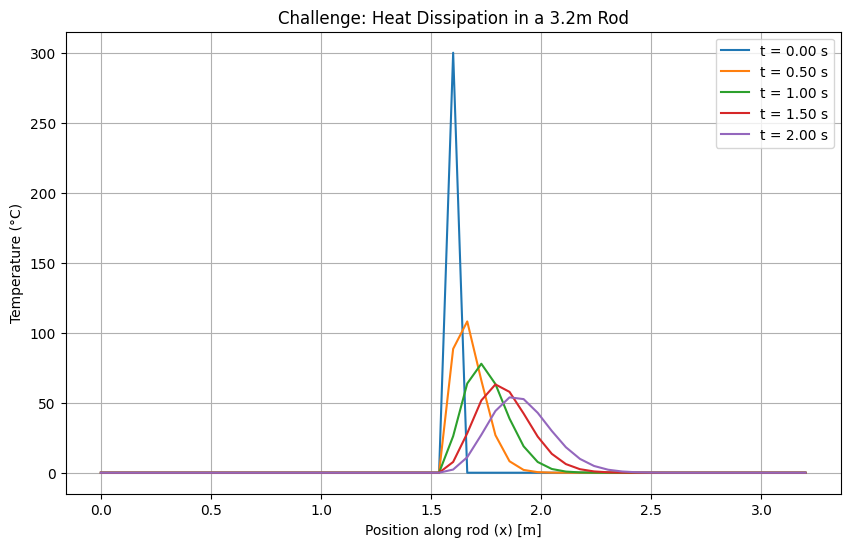

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Initialize MODIFIED Parameters ---
L = 3.2           # New Length of the rod (meters)
T = 2.0           # New Total simulation time (seconds)
nx = 51           # Number of spatial grid points (odd for a center)
# nt must be adjusted for stability. Let's start with a high value.
nt = 8000
alpha = 0.01      # Thermal diffusivity

# --- 2. Discretize the Domain ---
dx = L / (nx - 1)
dt = T / nt

# --- 3. Check Stability Condition ---
r = alpha * dt / dx**2
print(f"--- Challenge Parameters ---")
print(f"Rod Length L = {L} m")
print(f"Space step dx = {dx:.4f} m")
print(f"Time step dt = {dt:.6f} s")
print(f"Stability parameter r = {r:.4f}")

if r > 0.5:
    required_nt = (alpha * T * (nx - 1)**2) / (0.5 * L**2)
    print(f"\n--- WARNING: STABILITY FAILED (r > 0.5) ---")
    print(f"With nx={nx}, you need at least nt = {int(np.ceil(required_nt))} to achieve stability.")
else:
    print("\nStability condition r <= 0.5 is satisfied.")


# --- 4. Set Initial and Boundary Conditions ---
x = np.linspace(0, L, nx)
u = np.zeros(nx)
# Set the new initial temperature pulse at the center
u[int((nx - 1) / 2)] = 300.0

# --- 5. & 6. Time-stepping and Output ---
u_snapshots = [u.copy()]
snapshot_interval = nt // 4 # Store 4 snapshots over the total time

for n in range(nt):
    u_old = u.copy()
    for i in range(1, nx - 1):
        u[i] = u_old[i] + r * (u_old[i] + u_old[i-1] - 2*u_old[i])

    if (n + 1) % snapshot_interval == 0:
        u_snapshots.append(u.copy())

# --- Plotting the results ---
plt.figure(figsize=(10, 6))
for i, u_snap in enumerate(u_snapshots):
    time = i * snapshot_interval * dt
    # The first plot is the initial condition at t=0
    if i == 0:
        time = 0.0
    plt.plot(x, u_snap, label=f't = {time:.2f} s')

plt.xlabel('Position along rod (x) [m]')
plt.ylabel('Temperature (°C)')
plt.title('Challenge: Heat Dissipation in a 3.2m Rod')
plt.legend()
plt.grid(True)
plt.show()

##  3D visualization of the solution


--- Stability Check ---
r = 0.0006
✅ Stability condition r <= 0.5 is satisfied


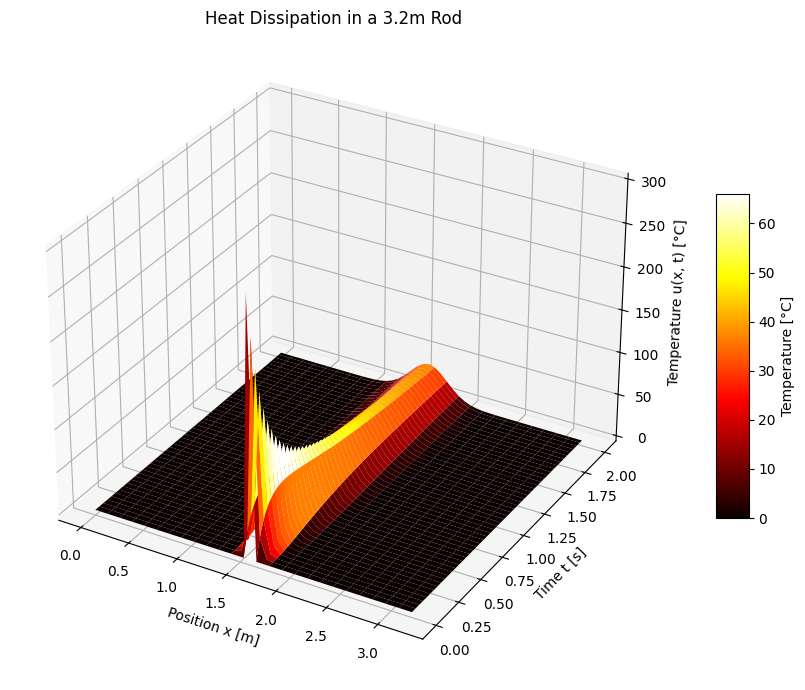

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# --- 1. Initialize MODIFIED Parameters ---
L = 3.2           # Length of the rod (meters)
T = 2.0           # Total simulation time (seconds)
nx = 51           # Number of spatial grid points (odd for center)
nt = 8000         # Number of time steps (ensures stability)
alpha = 0.01      # Thermal diffusivity

# --- 2. Discretize the Domain ---
dx = L / (nx - 1)
dt = T / nt
x = np.linspace(0, L, nx)
t = np.linspace(0, T, nt + 1)

# --- 3. Stability Check ---
r = alpha * dt / dx**2
print(f"--- Stability Check ---")
print(f"r = {r:.4f}")
if r > 0.5:
    print("⚠️ WARNING: Stability condition not met (r > 0.5)")
else:
    print("✅ Stability condition r <= 0.5 is satisfied")

# --- 4. Initial & Boundary Conditions ---
u = np.zeros(nx)
u[int((nx - 1) / 2)] = 300.0  # Pulse at center
u_all = np.zeros((nt + 1, nx))  # For storing the whole time evolution
u_all[0, :] = u.copy()

# --- 5. Time-Stepping ---
for n in range(1, nt + 1):
    u_new = u.copy()
    for i in range(1, nx - 1):
        u_new[i] = u[i] + r * (u[i+1] + u[i-1] - 2*u[i])
    u = u_new
    u_all[n, :] = u.copy()

# --- 6. 3D Surface Plot ---
X, T_grid = np.meshgrid(x, t)
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, T_grid, u_all, cmap='hot', edgecolor='none')
ax.set_title("Heat Dissipation in a 3.2m Rod")
ax.set_xlabel("Position x [m]")
ax.set_ylabel("Time t [s]")
ax.set_zlabel("Temperature u(x, t) [°C]")
fig.colorbar(surf, shrink=0.5, aspect=10, label="Temperature [°C]")
plt.tight_layout()
plt.show()

 ## Results and Discussion of the Challenge
- *Stability Management:* The primary challenge was maintaining stability. By increasing the rod length L significantly, the space step Δx became larger. Since Δx is squared in the denominator of the stability parameter r, this drastically increased the tendency for r to be large. To counteract this, the number of time steps nt had to be substantially increased (to 8000 in this solution) to make Δt small enough to keep r below the 0.5 threshold. This is a critical lesson in numerical methods: changing one parameter often necessitates adjusting others to maintain a valid simulation.

- *Slower Diffusion:* Comparing the plots to the first example, we can see that even though the simulation ran for a much longer time (2.0s vs 0.1s), the heat has not reached the ends of the rod. This is because the rod is much longer (3.2m vs 1.0m). Heat diffusion is a relatively slow process, and the increased distance means it takes significantly more time for the thermal energy to propagate.

- *Amplitude and Profile:* The initial peak temperature of 300°C drops very quickly, as the heat immediately begins to flow into the adjacent, colder sections of the rod. The resulting temperature profiles are wider and flatter compared to the first example at equivalent early stages, which is characteristic of diffusion over a larger domain.

**Result**

The overall behavior remains physically consistent, demonstrating the robustness of the FTCS method when its stability condition is respected.